## Decision Tree - Home Stats Only 

In [17]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import the packages needed for the Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn import tree
import matplotlib.pyplot as plt

In [18]:
# read in the csv
df = pd.read_csv('../csv_files/Home_Only_Classification.csv',index_col=0)
df.head(2)

,H_FTPct,H_EFGPct,H_ThreePARt,H_FTR,H_REBPct,H_BLKPct,H_AST_TOV_Ratio,Target
0,0.833,0.461538,0.395604,0.329670,0.506173,0.036585,1.785714,0
1,0.885,0.430851,0.404255,0.276596,0.538462,0.024390,1.133333,0


In [19]:
# Splitting up our data into variable and target data
X = df.iloc[:, :-1] # Variable
Y = df.Target # Target

In [20]:
# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2019)

In [21]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=3, max_features=7, criterion='gini', splitter='best', random_state=2019)

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
Y_pred = clf.predict(X_test)

In [22]:
# Model Accuracy, how often is the Decision Tree correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

# We are going to look at the classification report and also the confusion matrix for the Decision Tree  
print(metrics.classification_report(Y_test, Y_pred))
print(metrics.confusion_matrix(Y_test, Y_pred))

Accuracy: 0.7294160319187523
              precision    recall  f1-score   support

           0       0.68      0.65      0.66      1135
           1       0.76      0.78      0.77      1622

    accuracy                           0.73      2757
   macro avg       0.72      0.72      0.72      2757
weighted avg       0.73      0.73      0.73      2757

[[ 738  397]
 [ 349 1273]]


In [23]:
# Calculating accuracy, F1 score, and AUC 
print('Accuracy:', metrics.accuracy_score(Y_test, Y_pred))
print('F1_Score:', metrics.f1_score(Y_test, Y_pred, average='weighted'))
print('AUC:', metrics.roc_auc_score(Y_test, Y_pred, average='weighted'))

Accuracy: 0.7294160319187523
F1_Score: 0.728466098427485
AUC: 0.7175269015790589


In [24]:
# Displaying the feature importance
# define the feature importance variable 
# use the feature importance values from the decision tree above, sort in descending order 
feature_imp = pd.Series(clf.feature_importances_,index=df.iloc[:,:-1].columns).sort_values(ascending=False)

# print the results 
feature_imp

H_EFGPct           0.712310
H_REBPct           0.228488
H_AST_TOV_Ratio    0.059202
H_BLKPct           0.000000
H_FTR              0.000000
H_ThreePARt        0.000000
H_FTPct            0.000000
dtype: float64

In [25]:
#from sklearn.externals.six import StringIO  
#from IPython.display import Image  
#from sklearn.tree import export_graphviz
#import pydotplus

#dot_data = StringIO()

#export_graphviz(clf, out_file=dot_data,  
 #               filled=True, rounded=True,
  #              special_characters=True)

#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#Image(graph.create_png())

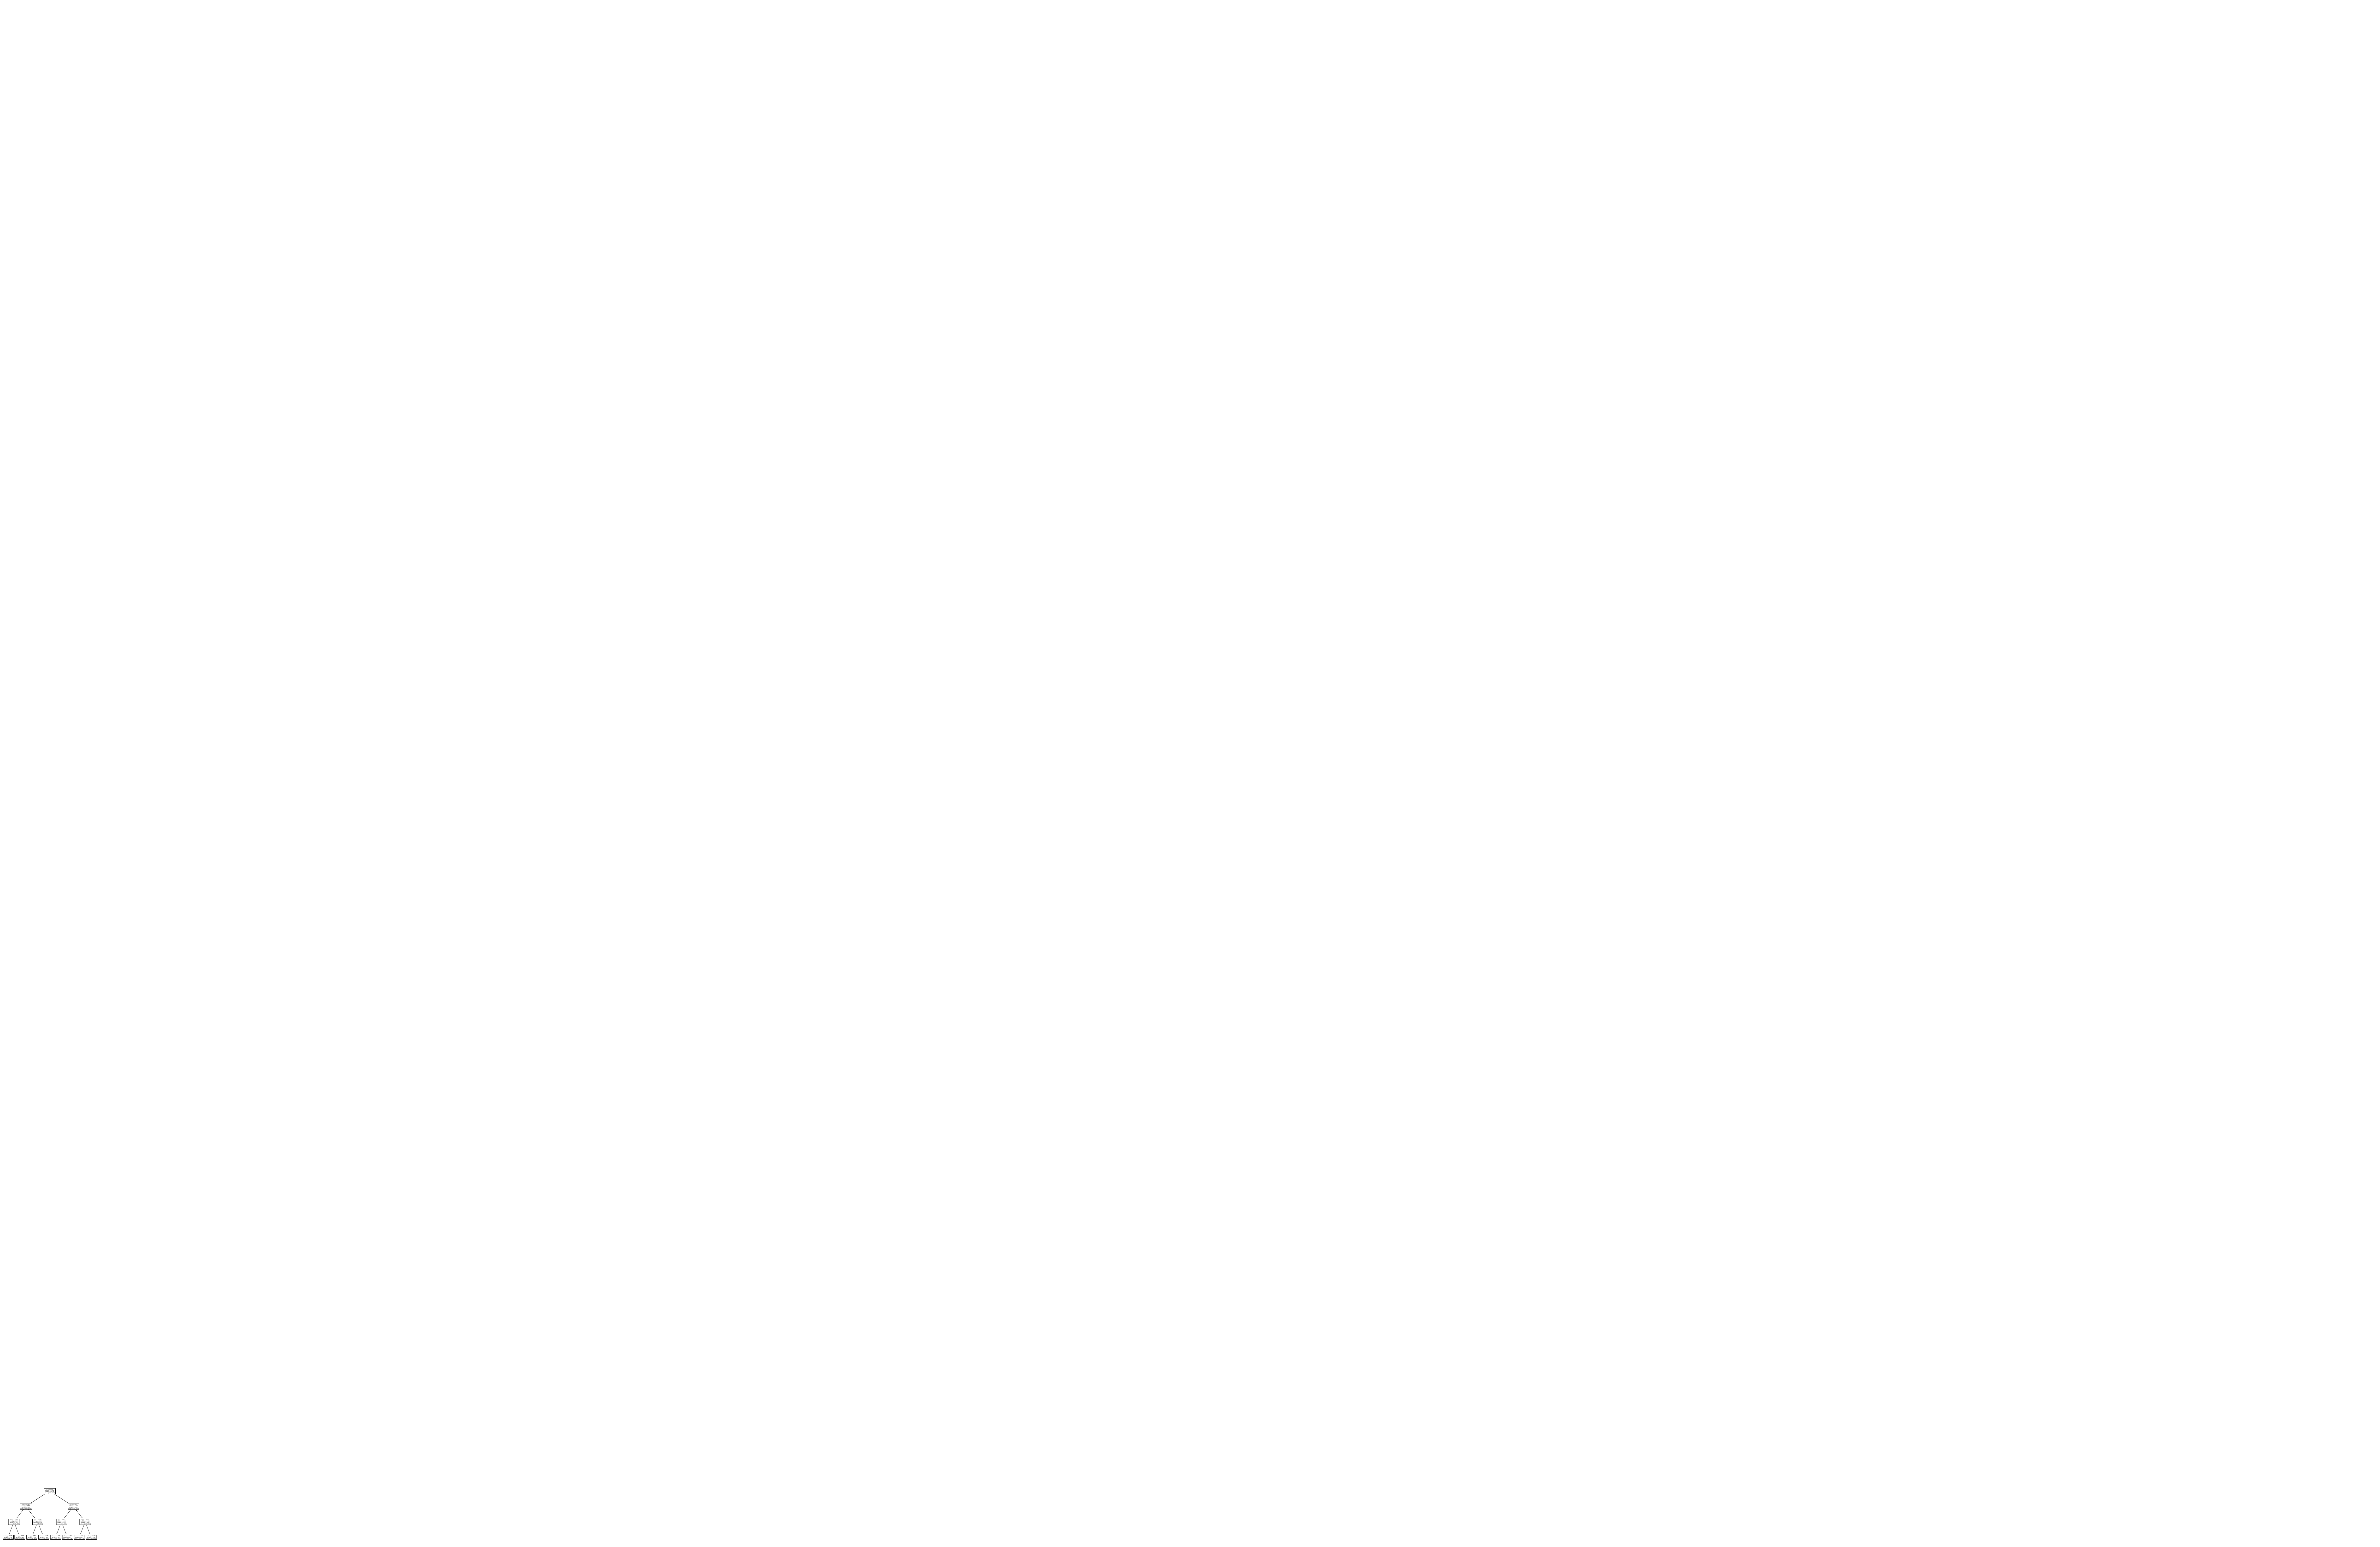

In [26]:
from sklearn import tree
tree.plot_tree(clf)
fig = plt.gcf()
fig.set_size_inches(150,100)
fig.savefig('tree_final_Home.pdf', clear=True, quality=100)

In [27]:
X.iloc[:, 4]

0       0.506173
1       0.538462
2       0.486486
3       0.475000
4       0.540816
5       0.523810
6       0.404255
7       0.466102
8       0.455556
9       0.569892
10      0.574713
11      0.566038
12      0.471910
13      0.481132
14      0.544444
15      0.533333
16      0.604651
17      0.494253
18      0.518519
19      0.547170
20      0.590476
21      0.531646
22      0.476636
23      0.537634
24      0.500000
25      0.488636
26      0.611111
27      0.500000
28      0.484375
29      0.562500
          ...   
9160    0.405063
9161    0.513761
9162    0.525641
9163    0.468354
9164    0.567901
9165    0.500000
9166    0.445946
9167    0.473684
9168    0.505495
9169    0.440860
9170    0.571429
9171    0.516484
9172    0.382979
9173    0.439024
9174    0.552083
9175    0.506667
9176    0.488372
9177    0.448276
9178    0.500000
9179    0.477273
9180    0.469880
9181    0.603960
9182    0.534884
9183    0.465347
9184    0.444444
9185    0.400000
9186    0.473118
9187    0.4675

In [54]:
df.count()

H_FTPct            9844
H_EFGPct           9844
H_ThreePARt        9844
H_FTR              9844
H_REBPct           9844
H_BLKPct           9844
H_AST_TOV_Ratio    9844
A_FTPct            9844
A_EFGPct           9844
A_ThreePARt        9844
A_FTR              9844
A_REBPct           9844
A_BLKPct           9844
A_AST_TOV_Ratio    9844
Target             9844
dtype: int64